# Pulsar Star

HTRU2 is a data set which describes a sample of pulsar candidates collected during the High Time Resolution Universe Survey .

Pulsars are a rare type of Neutron star that produce radio emission detectable here on Earth. They are of considerable scientific interest as probes of space-time, the inter-stellar medium, and states of matter .

As pulsars rotate, their emission beam sweeps across the sky, and when this crosses our line of sight, produces a detectable pattern of broadband radio emission. As pulsars rotate rapidly, this pattern repeats periodically. Thus pulsar search involves looking for periodic radio signals with large radio telescopes.

Each pulsar produces a slightly different emission pattern, which varies slightly with each rotation . Thus a potential signal detection known as a 'candidate', is averaged over many rotations of the pulsar, as determined by the length of an observation. In the absence of additional info, each candidate could potentially describe a real pulsar. However in practice almost all detections are caused by radio frequency interference (RFI) and noise, making legitimate signals hard to find.

Machine learning tools are now being used to automatically label pulsar candidates to facilitate rapid analysis. Classification systems in particular are being widely adopted, which treat the candidate data sets as binary classification problems. Here the legitimate pulsar examples are a minority positive class, and spurious examples the majority negative class.

The data set shared here contains 16,259 spurious examples caused by RFI/noise, and 1,639 real pulsar examples. These examples have all been checked by human annotators.

Each row lists the variables first, and the class label is the final entry. The class labels used are 0 (negative) and 1 (positive)

## Attribute Information:

Each candidate is described by 8 continuous variables, and a single class variable. The first four are simple statistics obtained from the integrated pulse profile (folded profile). This is an array of continuous variables that describe a longitude-resolved version of the signal that has been averaged in both time and frequency . The remaining four variables are similarly obtained from the DM-SNR curve . These are summarised below:

   1 Mean of the integrated profile.
   
   2 Standard deviation of the integrated profile.
   
   3 Excess kurtosis of the integrated profile.
   
   4 Skewness of the integrated profile.
   
   5 Mean of the DM-SNR curve.
   
   6 Standard deviation of the DM-SNR curve.
   
   7 Excess kurtosis of the DM-SNR curve.
   
   8 Skewness of the DM-SNR curve.
   
   9 Class


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#sns.set()
import warnings
warnings.filterwarnings('ignore')

pulsar=pd.read_csv('pulsar_stars.csv')

In [2]:
pulsar.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [3]:
pulsar.isnull().sum()

 Mean of the integrated profile                  0
 Standard deviation of the integrated profile    0
 Excess kurtosis of the integrated profile       0
 Skewness of the integrated profile              0
 Mean of the DM-SNR curve                        0
 Standard deviation of the DM-SNR curve          0
 Excess kurtosis of the DM-SNR curve             0
 Skewness of the DM-SNR curve                    0
target_class                                     0
dtype: int64

In [4]:
pulsar.describe()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
count,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000
mean,111.079968,46.549532,0.477857,1.770279,12.614400,26.326515,8.303556,104.857709,0.091574
std,25.652935,6.843189,1.064040,6.167913,29.472897,19.470572,4.506092,106.514540,0.288432
min,5.812500,24.772042,-1.876011,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000
25%,100.929688,42.376018,0.027098,-0.188572,1.923077,14.437332,5.781506,34.960504,0.000000
50%,115.078125,46.947479,0.223240,0.198710,2.801839,18.461316,8.433515,83.064556,0.000000
75%,127.085938,51.023202,0.473325,0.927783,5.464256,28.428104,10.702959,139.309331,0.000000
max,192.617188,98.778911,8.069522,68.101622,223.392140,110.642211,34.539844,1191.000837,1.000000


In [5]:
pulsar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
 Mean of the integrated profile                  17898 non-null float64
 Standard deviation of the integrated profile    17898 non-null float64
 Excess kurtosis of the integrated profile       17898 non-null float64
 Skewness of the integrated profile              17898 non-null float64
 Mean of the DM-SNR curve                        17898 non-null float64
 Standard deviation of the DM-SNR curve          17898 non-null float64
 Excess kurtosis of the DM-SNR curve             17898 non-null float64
 Skewness of the DM-SNR curve                    17898 non-null float64
target_class                                     17898 non-null int64
dtypes: float64(8), int64(1)
memory usage: 1.2 MB


In [6]:
cols=['mean_IP','std_IP','exc_kurt_IP','skew_IP','mean_DM_SNR','std_DM_SNR','exc_kurt_DM_SNR','skew_DM_SNR','target']
pulsar.columns=cols

In [7]:
pulsar.head()

,mean_IP,std_IP,exc_kurt_IP,skew_IP,mean_DM_SNR,std_DM_SNR,exc_kurt_DM_SNR,skew_DM_SNR,target
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


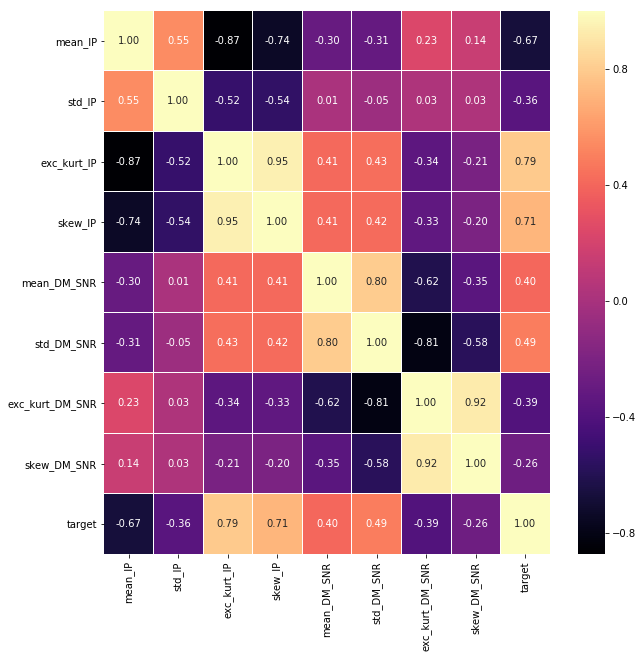

In [8]:
fig,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(pulsar.corr(), ax=ax, annot=True, linewidths=0.05, fmt= '.2f',cmap="magma")
plt.show()


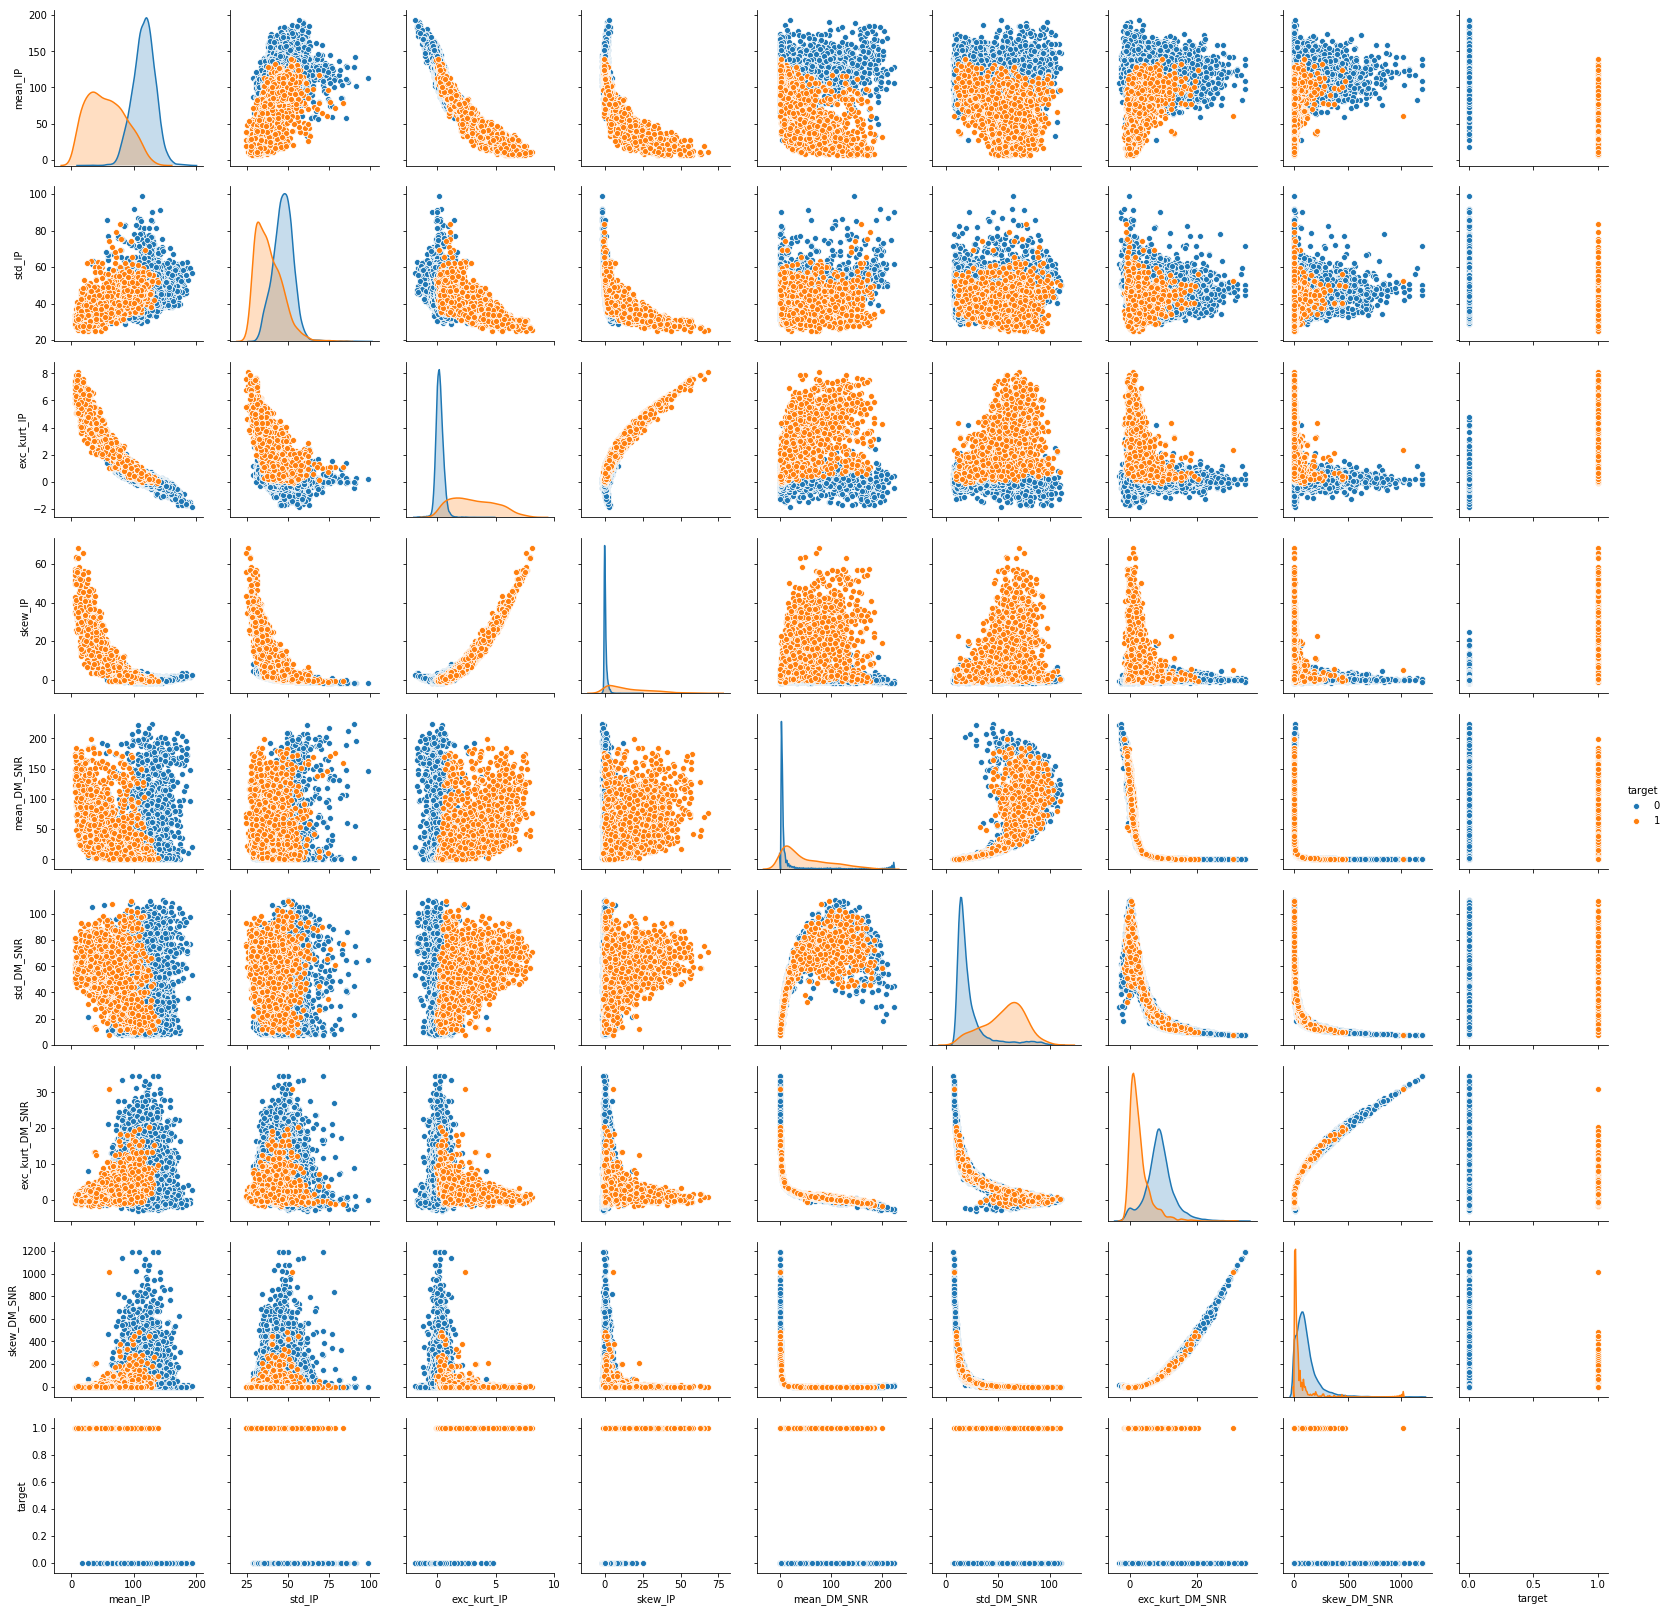

In [9]:
sns.pairplot(pulsar,hue='target')

# Classification

LR: 0.973739 (0.002364)
LDA: 0.974927 (0.003792)
KNN: 0.977581 (0.002545)
CART: 0.967943 (0.003264)
NB: 0.944335 (0.004754)
SVM: 0.973390 (0.003401)


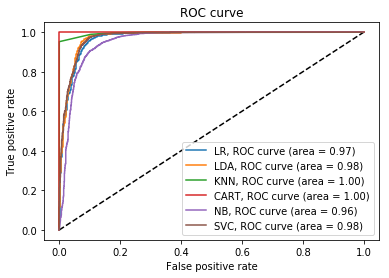

--------------------------
LogisticRegression Report
--------------------------
accuracy = 0.9751396648044692
confusion matrix [[3244   15]
 [  74  247]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3259
           1       0.94      0.77      0.85       321

   micro avg       0.98      0.98      0.98      3580
   macro avg       0.96      0.88      0.92      3580
weighted avg       0.97      0.98      0.97      3580



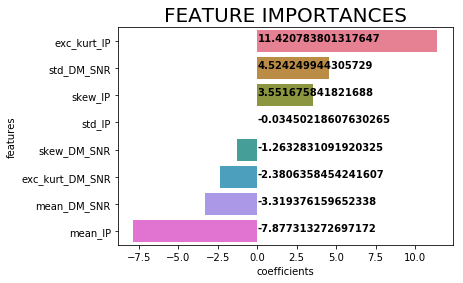

--------------------------
LinearDiscriminantAnalysis Report
--------------------------
accuracy = 0.9762569832402235
confusion matrix [[3243   16]
 [  69  252]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3259
           1       0.94      0.79      0.86       321

   micro avg       0.98      0.98      0.98      3580
   macro avg       0.96      0.89      0.92      3580
weighted avg       0.98      0.98      0.98      3580



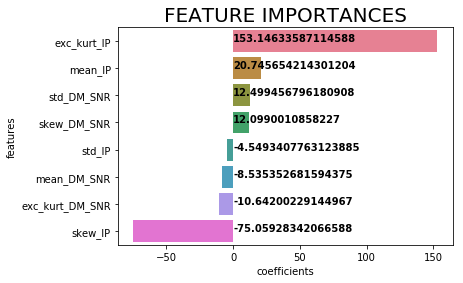

--------------------------
KNeighborsClassifier Report
--------------------------
accuracy = 0.9804469273743017
confusion matrix [[3241   18]
 [  52  269]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      3259
           1       0.94      0.84      0.88       321

   micro avg       0.98      0.98      0.98      3580
   macro avg       0.96      0.92      0.94      3580
weighted avg       0.98      0.98      0.98      3580

--------------------------
DecisionTreeClassifier Report
--------------------------
accuracy = 0.9639664804469273
confusion matrix [[3183   76]
 [  53  268]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      3259
           1       0.78      0.83      0.81       321

   micro avg       0.96      0.96      0.96      3580
   macro avg       0.88      0.91      0.89      3580
weighted avg       0.97      0.96      0.96      3580



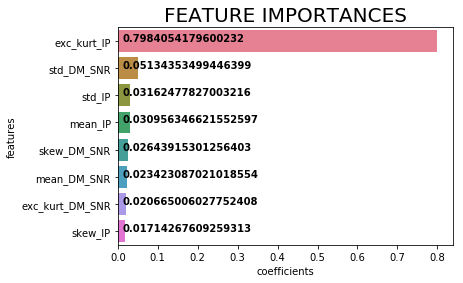

--------------------------
GaussianNB Report
--------------------------
accuracy = 0.943854748603352
confusion matrix [[3104  155]
 [  46  275]]
              precision    recall  f1-score   support

           0       0.99      0.95      0.97      3259
           1       0.64      0.86      0.73       321

   micro avg       0.94      0.94      0.94      3580
   macro avg       0.81      0.90      0.85      3580
weighted avg       0.95      0.94      0.95      3580

--------------------------
SVC Report
--------------------------
accuracy = 0.975977653631285
confusion matrix [[3246   13]
 [  73  248]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3259
           1       0.95      0.77      0.85       321

   micro avg       0.98      0.98      0.98      3580
   macro avg       0.96      0.88      0.92      3580
weighted avg       0.98      0.98      0.97      3580



In [10]:
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC


y = pulsar["target"].values
x = pulsar.drop(["target"],axis=1)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=.2,random_state=42)

scaler = MinMaxScaler()# escala as features entre 0 e 1.

X_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train_scaled)

X_test_scaled = scaler.fit_transform(X_test)
X_test = pd.DataFrame(X_test_scaled)

seed = 7
scoring = 'accuracy'

models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, X_train, y_train,cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)


from sklearn import metrics

lr=LogisticRegression().fit(X_train,y_train)
prob_lr=lr.predict_proba(X_train)

lda=LinearDiscriminantAnalysis().fit(X_train,y_train)
prob_lda=lda.predict_proba(X_train)

knn=KNeighborsClassifier().fit(X_train,y_train)
prob_knn=knn.predict_proba(X_train)

cart=DecisionTreeClassifier().fit(X_train,y_train)
prob_cart=cart.predict_proba(X_train)

gnb=GaussianNB().fit(X_train,y_train)
prob_gnb=gnb.predict_proba(X_train)

svm=SVC(probability=True).fit(X_train,y_train)
prob_svm=svm.predict_proba(X_train)


#Compute the ROC curve: true positives/false positives

tpr_lr,fpr_lr,thresh_lr=metrics.roc_curve(y_train,prob_lr[:,0])
tpr_lda,fpr_lda,thresh_lda=metrics.roc_curve(y_train,prob_lda[:,0])
tpr_knn,fpr_knn,thresh_knn=metrics.roc_curve(y_train,prob_knn[:,0])
tpr_cart,fpr_cart,thresh_cart=metrics.roc_curve(y_train,prob_cart[:,0])
tpr_gnb,fpr_gnb,thresh_gnb=metrics.roc_curve(y_train,prob_gnb[:,0])
tpr_svm,fpr_svm,thresh_svm=metrics.roc_curve(y_train,prob_svm[:,0])

#Area under Curve (AUC)
from sklearn.metrics import auc

roc_auc_lr = auc(fpr_lr, tpr_lr)
roc_auc_lda = auc(fpr_lda, tpr_lda)
roc_auc_knn = auc(fpr_knn, tpr_knn)
roc_auc_cart = auc(fpr_cart, tpr_cart)
roc_auc_gnb = auc(fpr_gnb, tpr_gnb)
roc_auc_svm = auc(fpr_svm, tpr_svm)

#Plotting the ROC curves


plt.figure()
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_lr, tpr_lr, label='LR, ROC curve (area = %0.2f)' % roc_auc_lr)
plt.plot(fpr_lda, tpr_lda, label='LDA, ROC curve (area = %0.2f)' % roc_auc_lda)
plt.plot(fpr_knn, tpr_knn, label='KNN, ROC curve (area = %0.2f)' % roc_auc_knn)
plt.plot(fpr_cart, tpr_cart, label='CART, ROC curve (area = %0.2f)' % roc_auc_cart)
plt.plot(fpr_gnb, tpr_gnb, label='NB, ROC curve (area = %0.2f)' % roc_auc_gnb)
plt.plot(fpr_svm, tpr_svm, label='SVC, ROC curve (area = %0.2f)' % roc_auc_svm)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

# Make predictions on validation dataset
print("--------------------------")
print("LogisticRegression Report")
print("--------------------------")
predictions_lr = lr.predict(X_test)
print("accuracy =",accuracy_score(y_test, predictions_lr))
print("confusion matrix",confusion_matrix(y_test, predictions_lr))
print(classification_report(y_test, predictions_lr))
df = pd.DataFrame(lr.coef_.ravel(),x.columns).reset_index()
df = df.rename(columns={"index":"features",0:"coefficients"})
df = df.sort_values(by="coefficients",ascending = False)
ax= sns.barplot(x = "coefficients" ,y ="features",data=df,palette="husl",orient='h')
plt.title("FEATURE IMPORTANCES",fontsize =20)
for i,j in enumerate(df["coefficients"]):
            ax.text(.011,i,j,weight = "bold")
plt.show()
        
print("--------------------------")
print("LinearDiscriminantAnalysis Report")
print("--------------------------")
predictions_lda = lda.predict(X_test)
print("accuracy =",accuracy_score(y_test, predictions_lda))
print("confusion matrix",confusion_matrix(y_test, predictions_lda))
print(classification_report(y_test, predictions_lda))
df = pd.DataFrame(lda.coef_.ravel(),x.columns).reset_index()
df = df.rename(columns={"index":"features",0:"coefficients"})
df = df.sort_values(by="coefficients",ascending = False)
ax= sns.barplot(x = "coefficients" ,y ="features",data=df,palette="husl",orient='h')
plt.title("FEATURE IMPORTANCES",fontsize =20)
for i,j in enumerate(df["coefficients"]):
            ax.text(.011,i,j,weight = "bold")
plt.show()

print("--------------------------")
print("KNeighborsClassifier Report")
print("--------------------------")
predictions_knn = knn.predict(X_test)
print("accuracy =",accuracy_score(y_test, predictions_knn))
print("confusion matrix",confusion_matrix(y_test, predictions_knn))
print(classification_report(y_test, predictions_knn))

print("--------------------------")
print("DecisionTreeClassifier Report")
print("--------------------------")
predictions = cart.predict(X_test)
print("accuracy =",accuracy_score(y_test, predictions))
print("confusion matrix",confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))
df = pd.DataFrame(cart.feature_importances_,x.columns).reset_index()
df = df.rename(columns={"index":"features",0:"coefficients"})
df = df.sort_values(by="coefficients",ascending = False)
ax= sns.barplot(x = "coefficients" ,y ="features",data=df,palette="husl",orient='h')
plt.title("FEATURE IMPORTANCES",fontsize =20)
for i,j in enumerate(df["coefficients"]):
            ax.text(.011,i,j,weight = "bold")
plt.show()

print("--------------------------")
print("GaussianNB Report")
print("--------------------------")
predictions_gnb = gnb.predict(X_test)
print("accuracy =",accuracy_score(y_test, predictions_gnb))
print("confusion matrix",confusion_matrix(y_test, predictions_gnb))
print(classification_report(y_test, predictions_gnb))


print("--------------------------")
print("SVC Report")
print("--------------------------")
predictions_svm = svm.predict(X_test)
print("accuracy =",accuracy_score(y_test, predictions_svm))
print("confusion matrix",confusion_matrix(y_test, predictions_svm))
print(classification_report(y_test, predictions_svm))
